In [37]:
import logging
import os
import sys
from collections import deque
from pickle import Pickler, Unpickler
from random import shuffle

import numpy as np
from tqdm import tqdm
import time

from Arena import Arena
from MCTS import MCTS
from Game import Game
from NeuralNet import *
from Coach import *
from pprint import pprint
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [26]:
class FinalAgent():
    '''
    This is the final agent in test mode
    
    '''
    def __init__(self,numMCTSSims,load_folder_file):
        self.numMCTSSims = numMCTSSims
#       The location of where the model is stored
        self.load_folder_file = load_folder_file
        self.nn_args = {
        'lr': 0.001,
        'dropout': 0.3,
        'epochs': 100,
        'batch_size': 64,
        'cuda': True,
        'num_channels': 128,
        'num_residual_layers': 20
        }
        self.game = Game()
        self.nn = NeuralNet(self.game)
        self.nn.nnet.args = self.nn_args
        self.load_model()
        
        self.args = dotdict()
        self.args['numMCTSSims'] = numMCTSSims
        print(self.args.numMCTSSims)
        self.mcts = MCTS(self.game, self.nn, self.args)
        
    def load_model(self):
        self.nn.nnet.model.load_weights(self.load_folder_file)
            
    def get_best_action(self,game,opt_player):
        
        game_copy = game.create_copy()
        canonicalBoard = game_copy.getCanonicalForm()
        self.mcts = MCTS(game_copy, self.nn, self.args)
        pi = self.mcts.getActionProb(game_copy, opt_player)
        action = np.random.choice(len(pi), p=pi)
        
        return action
            
class random_agent():
    '''
    
    This is a random agent
    '''
    def __init__(self):
        self.x = 0
    def get_best_action(self,game,opt_player):
        
        temp = game.getValidMoves()
        possible_moves = []
        for i in range(len(temp)):
            if temp[i] == 1:
                possible_moves.append(i)

        action = np.random.choice(possible_moves)
        return action
    
def play_game(agent1,agent2):
    '''
    Returns the result from 2 agents

    agent1 - Is fed in the game, supposed to return the action
    agent2 - Is fed in the game 

    This returns 1 if agent1 wins -1 if the agent2 wins
    -0.5 if there is a draw
    '''
    game = Game()
    game.getInitBoard()
    episodeStep = 0
    #gives us the current player
    current_player = 1

    while True:
        episodeStep += 1
        print("Currently on move ",episodeStep)

        if current_player == 1:
            
            action = agent1.get_best_action(game,current_player)
            game.getNextState(action)
        else:
            action = agent2.get_best_action(game,current_player)
            game.getNextState(action)
            

        current_player = -current_player
        r = game.getGameEnded(current_player)
        
        p_print(game.env.board)

        # The game has ended
        if r != 0:
            #print the board
            p_print(game.env.board)
            if r == 1 and current_player == -1:
                print(-1)
                return -1
            if r == -1 and current_player == -1:
                print(1)
                return 1
            
            return r
            
            break
            

In [8]:
weights_location = r"C:\Users\TheDarkAce\Jupyter scripts\COMP 552 RL\Project\Simplified connectX\temp2\temp.h5"
agent1 = FinalAgent(100,weights_location)
agent2 = FinalAgent(25,weights_location)
ragent = random_agent()

100
25


In [ ]:
play_game(agent2,ragent)

#### Pitting different MCTS depths with random agent

In [29]:

mcts_depths = [10,25,100,200,400]
# mcts_depths = [800]
weights_location = r"C:\Users\TheDarkAce\Jupyter scripts\COMP 552 RL\Project\Simplified connectX\temp2\temp.h5"
results = {}
start = time.time()
for i in mcts_depths:
    score = []
    for j in range(20):
        agent = FinalAgent(i,weights_location)
        ragent = random_agent()
        
        temp = play_game(agent,ragent)
        score.append(temp)
    results[f"r_vs_{i}"] = score
end = time.time() - start
print("total time",end)

10
Currently on move  1
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]])
Currently on move  2
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 1, 0, 0, 0]])
Currently on move  3
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 1, 0, 0, 1]])
Currently on move  4
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 2, 2, 1, 0, 0, 1]])
Currently on move  5
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 2, 2, 1

In [30]:
results.keys()

dict_keys(['r_vs_10', 'r_vs_25', 'r_vs_100', 'r_vs_200', 'r_vs_400'])

In [31]:
for k,v in results.items():
    
    wins = 0
    loses = 0
    draws = 0
    for j in v:
        if j == 1:
            wins += 1
        if j == -1:
            loses += 1
        if j == -0.5:
            draws += 1
    print(k, " wins : ", wins, "draws : ", draws, "loses : ", loses)
    

r_vs_10  wins :  15 draws :  0 loses :  5
r_vs_25  wins :  13 draws :  0 loses :  7
r_vs_100  wins :  13 draws :  2 loses :  5
r_vs_200  wins :  10 draws :  2 loses :  8
r_vs_400  wins :  7 draws :  2 loses :  11


In [39]:
# for 20 corrected
# r_vs_10  wins :  15 draws :  0 loses :  5
# r_vs_25  wins :  13 draws :  0 loses :  7
# r_vs_100  wins :  13 draws :  2 loses :  5
# r_vs_200  wins :  10 draws :  2 loses :  8
# r_vs_400  wins :  7 draws :  2 loses :  11

name = ["r_vs_400","r_vs_200","r_vs_100","r_vs_25","r_vs_10"]
wins = [15,13,13,10,7]
draws = [0,0,2,2,2]
losses = [5,7,5,8,11]


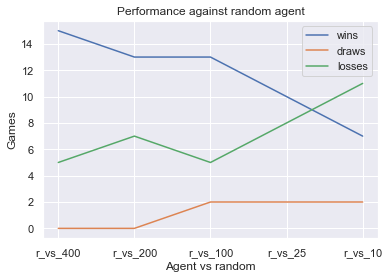

In [52]:
plt.plot(name,wins,label = "wins")
plt.plot(name,draws,label = "draws")
plt.plot(name,losses,label = "losses")
plt.ylabel('Games')
plt.xlabel('Agent vs random')
plt.title('Performance against random agent')
plt.legend()
plt.savefig("Agent_vs_random.png")
plt.show()


#### Pitting different MCTS depths against each other

In [32]:
mcts_depths_1 = [100,100,100,100,100,100]
mcts_depths_2 = [10,25,100,200,400,800]


weights_location = r"C:\Users\TheDarkAce\Jupyter scripts\COMP 552 RL\Project\Simplified connectX\temp2\temp.h5"
results_2 = {}

for i in range(len(mcts_depths_1)):
    score = []
    for j in range(20):
        agent1 = FinalAgent(mcts_depths_1[i],weights_location)
        agent2 = FinalAgent(mcts_depths_2[i],weights_location)
        
        temp = play_game(agent1,agent2)
        score.append(temp)
    results_2[f"{mcts_depths_1[i]}_vs_{mcts_depths_2[i]}"] = score

100
10
Currently on move  1
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]])
Currently on move  2
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 1, 0]])
Currently on move  3
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 2, 0, 1, 0]])
Currently on move  4
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [1, 0, 0, 2, 0, 1, 0]])
Currently on move  5
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [1, 0, 

KeyboardInterrupt: 

In [ ]:
for k,v in results_2.items():
    wins = 0
    loses = 0
    draws = 0
    for j in v:
        if j == 1:
            wins += 1
        if j == -1:
            loses += 1
        if j == -0.5:
            draws += 1
    print(k, " wins : ", wins, "draws : ", draws, "loses : ", loses)

In [48]:
name2 = ["100_vs_400","100_vs_200","100_vs_100","100_vs_25","100_vs_10"]
wins2 = [13,12,9,7,5]
draws2 = [2,3,4,2,2]
losses2 = [5,5,7,11,13]

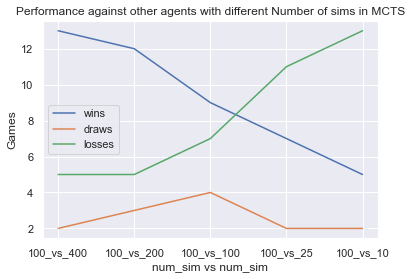

In [51]:
plt.plot(name2,wins2,label = "wins")
plt.plot(name2,draws2,label = "draws")
plt.plot(name2,losses2,label = "losses")
plt.ylabel('Games')
plt.xlabel('num_sim vs num_sim')
plt.title('Performance against other agents with different Number of sims in MCTS')
plt.legend()
plt.savefig("Agent_vs_agent.png")
plt.show()

### Lets make a few puzzles to test how well the NN and the algorithm is doing

In [33]:
class PureNN():
    '''
    This is the final agent in test mode
    
    '''
    def __init__(self,load_folder_file):
#       The location of where the model is stored
        self.load_folder_file = load_folder_file
        self.nn_args = {
        'lr': 0.001,
        'dropout': 0.3,
        'epochs': 100,
        'batch_size': 64,
        'cuda': True,
        'num_channels': 128,
        'num_residual_layers': 20
        }
        self.game = Game()
        self.nn = NeuralNet(self.game)
        self.load_model()
        
        
    def load_model(self):
        self.nn.nnet.model.load_weights(self.load_folder_file)
            
    def get_best_action(self,board):
        
        self.game.env.board = board
        cannonical = self.game.getCanonicalForm()
        action = self.nn.predict(cannonical)
        
        return action

In [34]:
weights_location = r"C:\Users\TheDarkAce\Jupyter scripts\COMP 552 RL\Project\Simplified connectX\temp2\temp.h5"
pure = PureNN(weights_location)

In [35]:
arr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1]
p_print(arr)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [2, 2, 2, 0, 0, 1, 1]])


In [36]:
pure.get_best_action(arr)

(array([0.10955124, 0.07764099, 0.02893163, 0.16036977, 0.33767506,
        0.21115091, 0.07468031], dtype=float32),
 array([-0.28618428], dtype=float32))